# Football Draft Main Program
MIS 740, Group 3

This program is intended to assist first-time and veteran sports betters by providing a data analytics platform for football team (soccer in the US) statistics. After prompting the user for their username and password (or allowing them to register a new account), the program allows users to change their password or delete their account information entirely, if chosen. From there, the program's main menu displays the four analytics modules that can be utilized to analyze data provided by the program's .csv file of football games from 2009-2019. 

Author: Murilo Gustineli

Date: 1 December 2019

Are you already a registered user? Enter Y (Yes) or N (No). Enter Q to quit: 
y
If you would like to login, please enter (L): 
If you would like to change your password, please enter (C):               
If you would like to delete your acount, please enter (D): 
Enter Q to quit: 
d
Please enter the username: 
LuckyDucky
Please enter the password: 
FinalsFinally
Are you sure you want to delete your account? Enter Y for (yes) or N for (NO)
y
Sorry to see you go. Your account has been deleted!


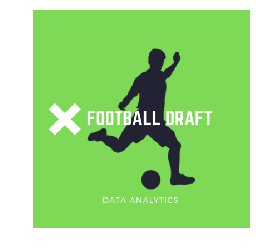

MAIN MENU
1. Home/Away Win Percentage (One country)
2. Overall Win/Loss Percentage (One country)
3. Average Home/Away Scores (One country)
4. Compare wins between two teams (Two countries)
5. Exit program
5
Thank you for using the program. You may now close this window.


In [3]:
# import pandas, set the alias as pd
import pandas as pd
# import numpy, set the alias as np
import numpy as np
# import matplotlib, set the alias as plt
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib image, set the alias as mpimg
import matplotlib.image as mpimg
# import os module
import os 
import mysql.connector # import mysql connector library

# suppress warnings from using two masks later in the program
import warnings
warnings.filterwarnings("ignore")

#################### LOGIN CODE #######################

# create a connect object
conn = mysql.connector.connect(
  host="localhost", # server
  user="root", # username
  passwd="" # password
)
cur = conn.cursor()
cur.execute('use FootballDraftDB')

# check if user already has an account
print('Are you already a registered user? Enter Y (Yes) or N (No). Enter Q to quit: ')
check = input()
while True:
    if check.lower() == 'n':
        # ask for username, first name, last name, and password
        # Get user input for username
        print('Please enter new username: ')
        userName = input()
        
        while True:
            # SQL statement for selecting the username
            selectSql= "SELECT UserName FROM user WHERE UserName= '"+userName+"'"
            # execute the query
            cur.execute(selectSql)
            
            if cur.fetchone() is not None:
                print('Username already exists. Please enter a different username:')
                userName = input()
            else:
                break
        # Get user input for first name, last name, and password
        print('Please enter first name: ')
        fName = input()
        print('Please enter the last name: ')
        lName = input()
        print('Please enter the password (25 characters max): ')
        password = input()

        # Prepare the insert statement with a prepared statement
        sql = "INSERT INTO user(UserName, FName, LName, Password) VALUES(%s, %s, %s, %s)"

        # The values to be inserted. Should match the order in the insert statement
        values = (userName, fName, lName, password)

        # execute the prepared statement, with values provided.
        cur.execute(sql, values)

        # how many rows are affected
        count = cur.rowcount

        # show a confirmation message to the user
        print('User created successfully! '+str(count) + ' row inserted.')

        # commit the changes to the database
        conn.commit()

        # close the connection
        conn.close ()
        break
        
    elif check.lower() == 'y':
        # ask user if they want to login, change password, or delete acount
        print('If you would like to login, please enter (L): \nIf you would like to change your password, please enter (C): \
              \nIf you would like to delete your acount, please enter (D): \nEnter Q to quit: ')
        options = input()
        
        # if user chooses to quit then exit the program
        if options.lower() == 'q':
            break
        
        while True:
            # ask for username, and password
            # Get user input for username
            print('Please enter the username: ')
            userName = input()
            print('Please enter the password: ')
            password = input()
            
            # SQL statement for selecting the username and password
            selectSql= "SELECT UserName, Password FROM user WHERE UserName= '"+userName+"' and Password= '"+password+"'"
            # execute the query
            cur.execute(selectSql)
            
            if cur.fetchone() is not None:
                # if the user chooses to login
                if options.lower() == 'l':
                    print('Login successful!')
                    break
                
                # if the user chooses to change password
                elif options.lower() == 'c':
                    print('Enter the new password: ')
                    # get new password
                    newPassword = input()
                    
                    # SQL statement for updating the password
                    updateSql = "UPDATE user SET Password = %s WHERE UserName= %s and Password= %s"
                    
                    # The values to be inserted.
                    values = (newPassword, userName, password)
                    
                    # execute the prepared statement, with values provided.
                    cur.execute(updateSql, values)
                    
                    # show a confirmation message to the user
                    print('Password changed successfully!')                    
                    
                    # commit the changes to the database
                    conn.commit()

                    # close the connection
                    conn.close ()
                    break
                
                # if the user chooses to delete its account
                elif options.lower() == 'd':
                    # double check if user wants to delete its account
                    print('Are you sure you want to delete your account? Enter Y for (yes) or N for (NO)')
                    delete = input()
                    
                    # if the user chooses yes
                    if delete.lower() == 'y':
                        deleteSql = "DELETE FROM user WHERE UserName= %s and Password= %s"
                        
                        values = (userName, password)
                        
                        # execute the prepared statement, with values provided.
                        cur.execute(deleteSql, values)

                        # show a confirmation message to the user
                        print('Sorry to see you go. Your account has been deleted!')

                        # commit the changes to the database
                        conn.commit()

                        # close the connection
                        conn.close ()
                        break
                                            
                    # if the user chooses no
                    elif delete.lower() == 'n':
                        print('If you would like to login, please enter (L): \nIf you would like to change your password, please enter (C): \
              \nIf you would like to delete your account, please enter (D):  \nEnter Q to quit: ')
                        options = input()
                        
                        # if user chooses to quit then exit the program
                        if options.lower() == 'q':
                            break
                    
                    # if user enters an invalid entry
                    else:
                        print('Invalid entry.')
                        print('If you would like to login, please enter (L): \nIf you would like to change your password, please enter (C): \
              \nIf you would like to delete your account, please enter (D): \nEnter Q to quit: ')
                        options = input()
                        
                        # if user chooses to quit then exit the program
                        if options.lower() == 'q':
                            break
            
            # if user enters an invalid entry     
            else:
                print('Login failed. Please try again.')
                
        # commit the changes to the database
        #conn.commit()

        # close the connection
        conn.close ()
        break
    
    # exit the program, stop future code from running
    elif check.lower() == 'q':
        print('Thank you for using the program. You may now close this window.')
        os._exit(1)
        break
    
    # return an error message if none of the 'if' statements above return true
    else:
        print('Wrong entry. Please enter Y for (Yes) or N for (No)')
        check = input()
        
######################## END LOGIN CODE ###################
######################## MAIN MENU CODE #################

#show program logo image
img=mpimg.imread('logo.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

# begin main menu loop and display module options for user
while True: 
    print('MAIN MENU')
    print('1. Home/Away Win Percentage (One country)')
    print('2. Overall Win/Loss Percentage (One country)')
    print('3. Average Home/Away Scores (One country)')
    print('4. Compare wins between two teams (Two countries)')
    print('5. Exit program')
    
    # ask user to choose one of the modules, or exit
    userChoice = int(input())
    
    # list with the five digits of choices
    inputList = [1, 2, 3, 4, 5]
    
    # input verification
    while userChoice not in inputList:
        print('That selection is invalid. Please choose Options 1-5')
        userChoice = int(input())

########## MODULE 1 ##########
    if userChoice == 1:
        # read the csv file and assign to the variable 'data'
        data = pd.read_csv('IFL_data_MAIN.csv')

        # Initialize the program with a repeat loop of 'y' to begin the while loop in line 5
        repeat = 'y'
        # Check to ensure the first item of the repeat variable is still 'y' for yes
        while repeat[0] == 'y':

            # specify which columns to look at, as some of the columns contain irrelevant data
            columnsToSee = ['home_team','away_team','home_score', 'away_score']

            # Ask the user which country they'd like to view
            print('Which country would you like to view?')
            country = str(input().title())

            # Prompt the user for Home or Away team
            print('Would you like the view the country\'s Home or Away wins? Please enter (Home) or (Away)')
            team = str(input().title())

            while True:    
                if team == 'Home':
                    # create a mask for checking the home_team for the entered country
                    mask = (data['home_team'] == country)
                    # apply the mask to 'columnstoSee' defined above
                    teamCountry = data[mask].loc[:,columnsToSee]
                    # Input verification (check home_team columns to see if country exists)
                    # this returns an error and asks the user to re-enter if the length of teamCountry is 0
                    # i.e. it returned no rows in which the country's name is mentioned
                    while len(teamCountry) == 0:
                        print('Country not found. Please enter a valid country.')
                        # ask the user to re-enter a country, and re-apply the mask to check for rows containing that country
                        country = str(input().title())
                        mask = (data['home_team'] == country) 
                        teamCountry = data[mask].loc[:,columnsToSee]

                    # set the mask to look at ONLY the home_team column this time, to begin counting 'total games'    
                    mask = teamCountry['home_team'] == country
                    teamCountry2 = teamCountry[mask].loc[:,columnsToSee]

                    # variable for counting up the total number of games the team played, starting with home_team
                    totalGames = len(teamCountry2)
                    #print(totalGames)
                    # This creates a new column in data frame (winning team) to help figure out how many games the country has won
                    # The column is filled in with 'home' if the home_score is greater than away_score, 'away' if the reverse,
                    # or tie if both scores are zero
                    teamCountry2['Winner'] = np.where(teamCountry2['home_score'] > teamCountry2['away_score'], 'home',
                                              (np.where(teamCountry2['away_score'] > teamCountry2['home_score'], 'away', 'tie')))

                    # revise columnsToSee to include the 'Winner' column
                    columnsToSee = ['home_team','away_team', 'Winner','home_score', 'away_score']

                    # now apply two masks -- first to specify home_team, and then to specify those rows in the new 'Winner column'
                    # where the value is 'home' to indicate the home team won
                    mask = teamCountry2['home_team'] == country
                    teamCountry3 = teamCountry2[mask].loc[:,columnsToSee]
                    mask = teamCountry3['Winner'] == 'home'
                    teamCountry4 = teamCountry3[mask].loc[:,columnsToSee]

                    # take the amount of rows that match the above two criteria, and assign that number to the 'totalWins' counter
                    totalWins = len(teamCountry4)
                    #print(totalWins)

                    # two more masks -- the first one for the away_team column, and then for rows in 'Winner' that say 'away'
                    mask = teamCountry2['away_team'] == country
                    teamCountry3 = teamCountry2[mask].loc[:,columnsToSee]
                    mask = teamCountry3['Winner'] == 'away'
                    teamCountry4 = teamCountry3[mask].loc[:,columnsToSee]

                    # add this number to the existing totalWins counter, so we have all the times the user's chosen country won at home and away
                    totalWins += len(teamCountry4)

                    # return a percentage of wins using totalWins / totalGames * 100
                    countryWins = (totalWins / totalGames) * 100

                    # print out for the user
                    print(country+' has played '+str(totalGames)+' '+str(team.title())+' games')
                    print(country+' has won '+str(totalWins)+' '+str(team.title())+' games')
                    print(country+' has won '+"{:,.2f}".format(countryWins)+'% of their '+str(team.title())+' games')
                    break
                elif team == 'Away':
                    # create a mask for checking the home_team for the entered country
                    mask = (data['away_team'] == country)
                    # apply the mask to 'columnstoSee' defined above
                    teamCountry = data[mask].loc[:,columnsToSee] 
                    # Input verification (check home_team columns to see if country exists)
                    # this returns an error and asks the user to re-enter if the length of teamCountry is 0
                    # i.e. it returned no rows in which the country's name is mentioned
                    while len(teamCountry) == 0:
                        print('Country not found. Please enter a valid country.')
                        # ask the user to re-enter a country, and re-apply the mask to check for rows containing that country
                        country = str(input().title())
                        mask = (data['away_team'] == country) 
                        teamCountry = data[mask].loc[:,columnsToSee]

                    # set the mask to look at ONLY the home_team column this time, to begin counting 'total games'    
                    mask = teamCountry['away_team'] == country
                    teamCountry2 = teamCountry[mask].loc[:,columnsToSee]

                    # variable for counting up the total number of games the team played, starting with home_team
                    totalGames = len(teamCountry2)
                    print(totalGames)
                    # This creates a new column in data frame (winning team) to help figure out how many games the country has won
                    # The column is filled in with 'home' if the home_score is greater than away_score, 'away' if the reverse,
                    # or tie if both scores are zero
                    teamCountry2['Winner'] = np.where(teamCountry2['home_score'] > teamCountry2['away_score'], 'home',
                                              (np.where(teamCountry2['away_score'] > teamCountry2['home_score'], 'away', 'tie')))

                    # revise columnsToSee to include the 'Winner' column
                    columnsToSee = ['home_team','away_team', 'Winner','home_score', 'away_score']

                    # now apply two masks -- first to specify home_team, and then to specify those rows in the new 'Winner column'
                    # where the value is 'home' to indicate the home team won
                    mask = teamCountry2['home_team'] == country
                    teamCountry3 = teamCountry2[mask].loc[:,columnsToSee]
                    mask = teamCountry3['Winner'] == 'home'
                    teamCountry4 = teamCountry3[mask].loc[:,columnsToSee]

                    # take the amount of rows that match the above two criteria, and assign that number to the 'totalWins' counter
                    totalWins = len(teamCountry4)
                    #print(totalWins)

                    # two more masks -- the first one for the away_team column, and then for rows in 'Winner' that say 'away'
                    mask = teamCountry2['away_team'] == country
                    teamCountry3 = teamCountry2[mask].loc[:,columnsToSee]
                    mask = teamCountry3['Winner'] == 'away'
                    teamCountry4 = teamCountry3[mask].loc[:,columnsToSee]

                    # add this number to the existing totalWins counter, so we have all the times the user's chosen country won at home and away
                    totalWins += len(teamCountry4)

                    # return a percentage of wins using totalWins / totalGames * 100
                    countryWins = (totalWins / totalGames) * 100

                    # print out for the user
                    print(country+' has played '+str(totalGames)+' '+str(team.title())+' games')
                    print(country+' has won '+str(totalWins)+' '+str(team.title())+' games')
                    print(country+' has won '+"{:,.2f}".format(countryWins)+'% of their '+str(team.title())+' games')
                    break
                else:
                    print('Input invalid. Please enter either Home or Away team: ')
                    team = str(input().title())

            # Pie chart from matplotlib
            labels = [country.capitalize()+"'s Win Percentage", country.capitalize()+"'s Loss Percentage"]
            sizes = [countryWins, 100-countryWins]

            # add colors and other effects
            colors = ['#d45087', 'skyblue']
            fig1, ax1 = plt.subplots()
            ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                    shadow=True, startangle=90)
            # Ensure that pie is drawn as a circle
            ax1.axis('equal')
            plt.show()

            # prompt the user to see if they want to run the program through again
            print('Would you like to see another country?')
            # ask for user input, and convert to lowercase, so 'Y' is the same as 'y'
            # if the first item (repeat[0]) is 'y', the overall while loop in the program is unbroken, 
            # and starts again from the beginning
            repeat = str(input())
            repeat = repeat.lower()
            
########## MODULE 2 ##########
    elif userChoice == 2:
        
        def scoreFunction(totalWins, totalGames):
            statWins = (totalWins / totalGames) * 100
            return statWins

        # read the csv file and assign to the variable 'data'
        data = pd.read_csv('IFL_data_MAIN.csv')

        # convert team names into all lowercase, so user input can also be converted to lowercase, 
        # making user input verification no longer case-sensitive
        data["home_team"]= data["home_team"].str.lower() 
        data["away_team"]= data["away_team"].str.lower() 

        # Initialize the program with a repeat loop of 'y' to begin the while loop in line 5
        repeat = 'y'

        # Check to ensure the first item of the repeat variable is still 'y' for yes
        while repeat[0] == 'y':

            # specify which columns to look at, as some of the columns contain irrelevant data
            columnsToSee = ['home_team','away_team']

            # Ask the user which country they'd like to view, convert to lowercase
            print('Which country would you like to view?')
            country = str(input())
            country = country.lower()

            # create a mask for checking EITHER the home_team or the away_team for the entered country
            mask = (data['home_team'] == country) | (data['away_team'] == country)
            # apply the mask to 'columnstoSee' defined above
            teamCountry = data[mask].loc[:,columnsToSee]

            # Input verification (check home_team and away_team columns to see if country exists)
            # this returns an error and asks the user to re-enter if the length of teamCountry is 0
            # i.e. it returned no rows in which the country's name is mentioned
            while len(teamCountry) == 0:
                print('Country not found. Please enter a valid country.')
                # ask the user to re-enter a country, and re-apply the mask to check for rows containing that country
                country = str(input())
                country = country.lower()
                mask = (data['home_team'] == country) | (data['away_team'] == country)
                teamCountry = data[mask].loc[:,columnsToSee]

            # set the mask to look at ONLY the home_team column this time, to begin counting 'total games'    
            mask = data['home_team'] == country
            teamCountry = data[mask].loc[:,columnsToSee]

            # variable for counting up the total number of games the team played, starting with home_team
            totalGames = len(teamCountry)

            # re-formats the mask to away_team
            mask = data['away_team'] == country
            teamCountry = data[mask].loc[:,columnsToSee]

            #adds this amount (# of games the country played in the away_team column) to the home_team column
            totalGames += len(teamCountry)


            # This creates a new column in data frame (winning team) to help figure out how many games the country has won
            # The column is filled in with 'home' if the home_score is greater than away_score, 'away' if the reverse,
            # or tie if both scores are zero
            data['Winner'] = np.where(data['home_score'] > data['away_score'], 'home',
                                      (np.where(data['away_score'] > data['home_score'], 'away', 'tie')))

            # revise columnsToSee to include the 'Winner' column
            columnsToSee = ['home_team','away_team', 'Winner']

            # now apply two masks -- first to specify home_team, and then to specify those rows in the new 'Winner column'
            # where the value is 'home' to indicate the home team won
            mask = data['home_team'] == country
            teamCountry = data[mask].loc[:,columnsToSee]
            mask = data['Winner'] == 'home'
            teamCountryTwo = teamCountry[mask].loc[:,columnsToSee]

            # take the amount of rows that match the above two criteria, and assign that number to the 'totalWins' counter
            totalWins = len(teamCountryTwo)

            # two more masks -- the first one for the away_team column, and then for rows in 'Winner' that say 'away'
            mask = data['away_team'] == country
            teamCountry = data[mask].loc[:,columnsToSee]
            mask = data['Winner'] == 'away'
            teamCountryTwo = teamCountry[mask].loc[:,columnsToSee]

            # add this number to the existing totalWins counter, so we have all the times the user's chosen country won at home and away
            totalWins += len(teamCountryTwo)

            # return a percentage of wins using totalWins / totalGames * 100
            countryWins = (totalWins / totalGames) * 100

            # print out for the user, capitalize the first letter in the country they inputted
            print(country.capitalize()+' has played '+str(totalGames)+' games')
            print(country.capitalize()+' has won '+str(totalWins)+' games')
            print(country.capitalize()+' has won '+"{:,.2f}".format(scoreFunction(totalWins, totalGames))+'% of their total games')

            # Pie chart from matplotlib
            labels = [country.capitalize()+"'s Win Percentage", country.capitalize()+"'s Loss Percentage"]
            sizes = [countryWins, 100-countryWins]

            # add colors and other effects
            colors = ['#8F8BFF', '#FF8B8B']
            fig1, ax1 = plt.subplots()
            ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                    shadow=True, startangle=90)
            # Ensure that pie is drawn as a circle
            ax1.axis('equal')
            plt.show()

            # prompt the user to see if they want to run the program through again    
            print('Would you like to see another country?')
            # ask for user input, and convert to lowercase, so 'Y' is the same as 'y'
            # if the first item (repeat[0]) is 'y', the overall while loop in the program is unbroken, 
            # and starts again from the beginning
            repeat = str(input())
            repeat = repeat.lower()
            
########## MODULE 3 ##########
    elif userChoice == 3:
        # read the csv file and assign to the variable 'data'
        data = pd.read_csv('IFL_data_MAIN.csv')

        # Initialize the program with a repeat loop of 'y' to begin the while loop in line 5
        repeat = 'y'
        # Check to ensure the first item of the repeat variable is still 'y' for yes
        while repeat[0] == 'y':

            # specify which columns to look at, as some of the columns contain irrelevant data
            columnsToSee = ['home_team','away_team','home_score','away_score']

            # Ask the user which country they'd like to view
            print('Which country would you like to view?')
            country = str(input().title())

            # create a mask for checking EITHER the home_team or the away_team for the entered country
            mask = (data['home_team'] == country) | (data['away_team'] == country)
            # apply the mask to 'columnstoSee' defined above
            teamCountry = data[mask].loc[:,columnsToSee]

            # Input verification (check home_team and away_team columns to see if country exists)
            # this returns an error and asks the user to re-enter if the length of teamCountry is 0
            # i.e. it returned no rows in which the country's name is mentioned
            while len(teamCountry) == 0:
                print('Country not found. Please enter a valid country.')
                # ask the user to re-enter a country, and re-apply the mask to check for rows containing that country
                country = str(input().title())
                mask = (data['home_team'] == country) | (data['away_team'] == country)
                teamCountry = data[mask].loc[:,columnsToSee]

            # set the mask to look at ONLY the home_team column this time, to begin counting 'total games'    
            mask = data['home_team'] == country
            teamCountry = data[mask].loc[:,columnsToSee]

            # variable for counting up the total number of games the team played, starting with home_team
            totalGames = len(teamCountry)

            # re-formats the mask to away_team
            mask = data['away_team'] == country
            teamCountry = data[mask].loc[:,columnsToSee]

            # adds this amount (# of games the country played in the away_team column) to the home_team column
            totalGames += len(teamCountry)

            # now apply two masks -- first to specify home_team
            # where the value is 'home' to indicate the home team won
            mask = data['home_team'] == country
            teamCountry = data[mask].loc[:,columnsToSee]
            # second to specify away_team
            # where the value is 'away' to indicate the home team won
            mask = data['away_team'] == country
            teamCountryTwo = data[mask].loc[:,columnsToSee]

            # sum the total home/away scores
            homeScoreFinal = teamCountry[['home_score','home_team']].groupby(['home_team']).sum().home_score[0]
            awayScoreFinal = teamCountryTwo[['away_score','away_team']].groupby(['away_team']).sum().away_score[0]

            # average score of total games played
            average = (homeScoreFinal+awayScoreFinal)/totalGames
            averageHomeScore = (homeScoreFinal/totalGames)
            averageAwayScore = (awayScoreFinal/totalGames)

            # display result for the user
            print(country+"'s average goals scored for a total of "+str(totalGames)+" games played is " + "{:,.0f}".format(average)+" goal(s)")

            objects = ('Home_Score', 'Away_Score')
            y_pos = np.arange(len(objects))

            plt.bar(y_pos, [averageHomeScore, averageAwayScore], align='center', alpha=0.5)
            plt.xticks(y_pos, objects)
            plt.ylabel('Average Scores')
            plt.title('Average Home & Away Scores')
            plt.show()

            # prompt the user to see if they want to run the program through again
            print('Would you like to see another country?')
            # ask for user input, and convert to lowercase, so 'Y' is the same as 'y'
            # if the first item (repeat[0]) is 'y', the overall while loop in the program is unbroken, 
            # and starts again from the beginning
            repeat = str(input())
            repeat = repeat.lower()

########## MODULE 4 ##########
    elif userChoice == 4:
        # read the csv file and assign to the variable 'data'
        data = pd.read_csv('IFL_data_MAIN.csv')

        # Initialize the program with a repeat loop of 'y' to begin the while loop in line 5
        repeat = 'y'
        # Check to ensure the first item of the repeat variable is still 'y' for yes
        while repeat[0] == 'y':

            # specify which columns to look at, as some of the columns contain irrelevant data
            columnsToSee = ['home_team','away_team', 'home_score', 'away_score']

            # Ask the user which country they'd like to view
            print('Which country would you like to view?')
            country1 = str(input().title())

            # Ask the user which country they'd like to view
            print('Which is the other country you would like to view?')
            country2 = str(input().title())

            # create a mask for checking EITHER the home_team or the away_team for the entered country
            mask = (data['home_team'] == country1) | (data['away_team'] == country1)
            # apply the mask to 'columnstoSee' defined above
            teamCountry1 = data[mask].loc[:,columnsToSee]
            #print(teamCountry1)

            # create a mask for checking EITHER the home_team or the away_team for the second country
            mask = (teamCountry1['home_team'] == country2) | (teamCountry1['away_team'] == country2)
            # apply the mask to 'columnstoSee' defined above
            teamCountry2 = teamCountry1[mask].loc[:,columnsToSee]
            #print(teamCountry2)

            # Input verification (check home_team and away_team columns to see if country exists)
            # this returns an error and asks the user to re-enter if the length of teamCountry is 0
            # i.e. it returned no rows in which the country's name is mentioned
            while len(teamCountry1) == 0:
                print(country1+ ' is not available. Please enter a valid country.')
                # ask the user to re-enter a country, and re-apply the mask to check for rows containing that country
                country1 = str(input().title())
                mask = (data['home_team'] == country1) | (data['away_team'] == country1)
                teamCountry1 = data[mask].loc[:,columnsToSee]

            while len(teamCountry2) == 0:
                print(country2+ ' is not available. Please enter a valid country.')
                # ask the user to re-enter a country, and re-apply the mask to check for rows containing that country
                country2 = str(input().title())
                mask = (teamCountry1['home_team'] == country2) | (teamCountry1['away_team'] == country2)
                teamCountry2 = teamCountry1[mask].loc[:,columnsToSee]

            # variable for counting up the total number of games the team played, starting with home_team
            totalGames = len(teamCountry2)
            #totalGames

            # This creates a new column in data frame (winning team) to help figure out how many games the country has won
            # The column is filled in with 'home' if the home_score is greater than away_score, 'away' if the reverse,
            # or tie if both scores are zero
            teamCountry2['Winner'] = np.where(teamCountry2['home_score'] > teamCountry2['away_score'], 'home',
                                      (np.where(teamCountry2['away_score'] > teamCountry2['home_score'], 'away', 'tie')))

            # revise columnsToSee to include the 'Winner' column
            columnsToSee = ['home_team','away_team', 'home_score', 'away_score','Winner']
            #teamCountry2

            # now apply two masks -- first to specify home_team, and then to specify those rows in the new 'Winner column'
            # where the value is 'home' to indicate the home team won
            mask = (teamCountry2['home_team'] == country1) & (teamCountry2['Winner'] == 'home')
            teamCountry3 = teamCountry2[mask].loc[:,columnsToSee]

            # take the amount of rows that match the above two criteria, and assign that number to the 'totalWins' counter
            totalWins = len(teamCountry3)
            #totalWins

            # now apply two masks -- first to specify home_team, and then to specify those rows in the new 'Winner column'
            # where the value is 'home' to indicate the home team won
            mask = (teamCountry2['away_team'] == country1) & (teamCountry2['Winner'] == 'away')
            teamCountry3 = teamCountry2[mask].loc[:,columnsToSee]

            # take the amount of rows that match the above criteria, so we have all the times the user's chosen country won at home and away
            totalWins += len(teamCountry3)
            #totalWins

            # return a percentage of wins using totalWins / totalGames * 100
            countryWins = (totalWins / totalGames) * 100
            #countryWins

            # print for the user
            #print(country1+ ' and '+ str(country2) +' played '+str(totalGames)+' games against eachother')
            #print(country1+ ' won '+ str(country2) +' played '+str(totalGames)+' games against eachother')
            print('The win percentage of '+ str(country1) +' is '"{:,.0f}".format(countryWins)+'% against ' + str(country2))

            # Pie chart from matplotlib
            labels = [country1.capitalize()+' against ' +country2.capitalize() +"'s Win Percentage", country1.capitalize()+' against ' +country2.capitalize()+"'s Loss Percentage"]
            sizes = [countryWins, 100-countryWins]

            # add colors and other effects
            colors = ['#bc5090', 'lightgreen']
            fig1, ax1 = plt.subplots()
            ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                    shadow=True, startangle=90)
            # Ensure that pie is drawn as a circle
            ax1.axis('equal')
            plt.show()

            # prompt the user to see if they want to run the program through again
            print('Would you like to see another country comparison?')
            # ask for user input, and convert to lowercase, so 'Y' is the same as 'y'
            # if the first item (repeat[0]) is 'y', the overall while loop in the program is unbroken, 
            # and starts again from the beginning
            repeat = str(input())
            repeat = repeat.lower()
            
########## EXIT OPTION ##########
    elif userChoice == 5:
        print('Thank you for using the program. You may now close this window.')
        break
        